In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#로이터 기사 데이터 셋을 로딩합니다.
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
train_data.shape #모양(구성) 확인

(8982,)

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [6]:
decoded_newswire #번역 결과

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[0]

3

In [8]:
#데이터의 준비

def vectorize_sequences(sequences, dimension = 10000):

  results = np.zeros((len(sequences),dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

#데이터의 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [10]:
#라벨 데이터의 엔코딩
def to_one_hot(labels,dimension=46):
  results = np.zeros((len(labels),dimension))

  for i, sequence in enumerate(labels):
    results[i, sequence] = 1

    return results

one_hot_train_labels = to_one_hot(train_labels)
oen_hot_test_labels = to_one_hot(test_labels)

In [11]:
#categorical 데이터로 변환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [38]:
# 신경망 구성 

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.summary() #요약

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# 훈련 데이터의 준비

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [41]:
# 모델 피팅
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 42ms/step - loss: 2.5807 - accuracy: 0.5294 - val_loss: 1.6825 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 1s 35ms/step - loss: 1.3771 - accuracy: 0.7136 - val_loss: 1.2707 - val_accuracy: 0.7320
Epoch 3/20
16/16 [==============================] - 1s 40ms/step - loss: 1.0228 - accuracy: 0.7873 - val_loss: 1.1107 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 1s 34ms/step - loss: 0.8057 - accuracy: 0.8295 - val_loss: 1.0233 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 31ms/step - loss: 0.6420 - accuracy: 0.8649 - val_loss: 0.9778 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 35ms/step - loss: 0.5185 - accuracy: 0.8914 - val_loss: 0.9584 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 36ms/step - loss: 0.4181 - accuracy: 0.9142 - val_loss: 0.9292 - val_accuracy: 0.8030
Epoch 8/20
16

In [42]:
# 학습 결과 불러오기
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

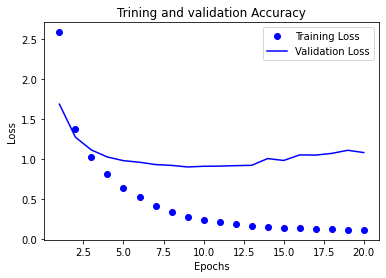

In [43]:
# 결과를 시각화
plt.plot (epochs, loss, 'bo', label = 'Training Loss')
plt.plot (epochs, val_loss, 'b-', label= 'Validation Loss')
plt.title('Trining and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

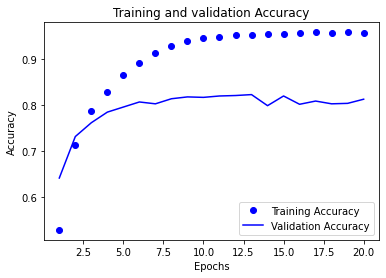

In [44]:
# 결과를 시각화 한다. 
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()